**Install Required Libraries and Import Libraries**

In [6]:
# Import required libraries
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


**Data Loading and Preprocessing**

In [7]:
# Load images and labels
data_dir = '/content/drive/MyDrive/Colab Notebooks/MangoLeafBD Dataset/MangoLeafBD Dataset'
classes = os.listdir(data_dir)  # List of class names based on folder names
images = []
labels = []

for label, class_name in enumerate(classes):
    class_folder = os.path.join(data_dir, class_name)
    for file in os.listdir(class_folder):
        img_path = os.path.join(class_folder, file)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (128, 128))  # Resize for consistency
        images.append(img)
        labels.append(label)

images = np.array(images)
labels = np.array(labels)


**Exploratory Data Analysis (EDA)**

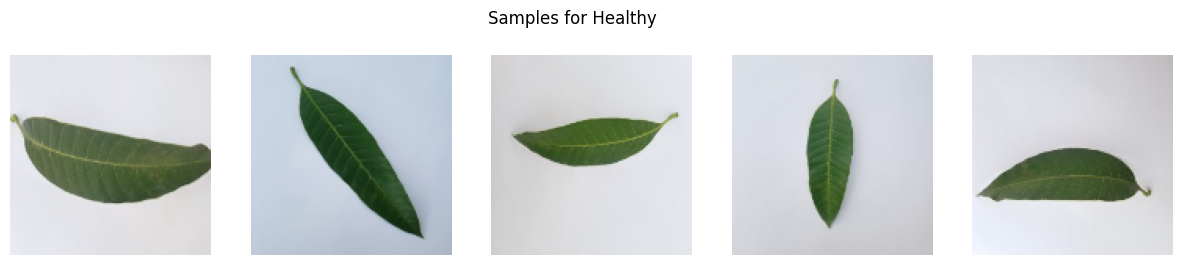

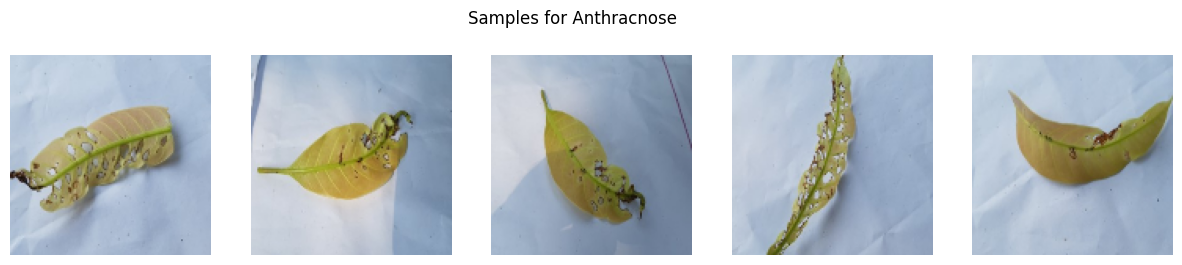

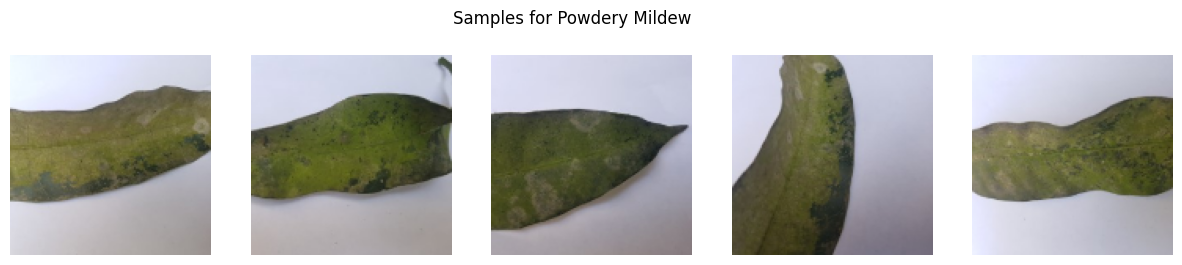

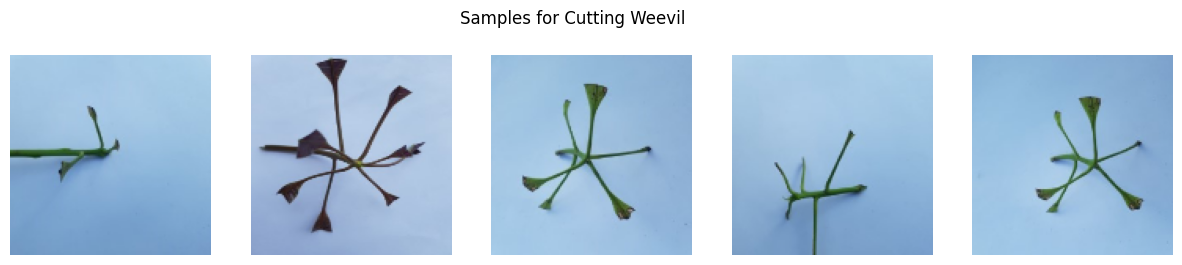

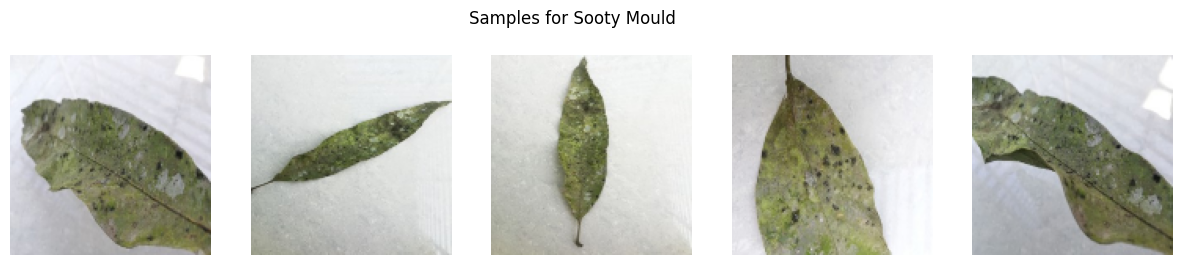

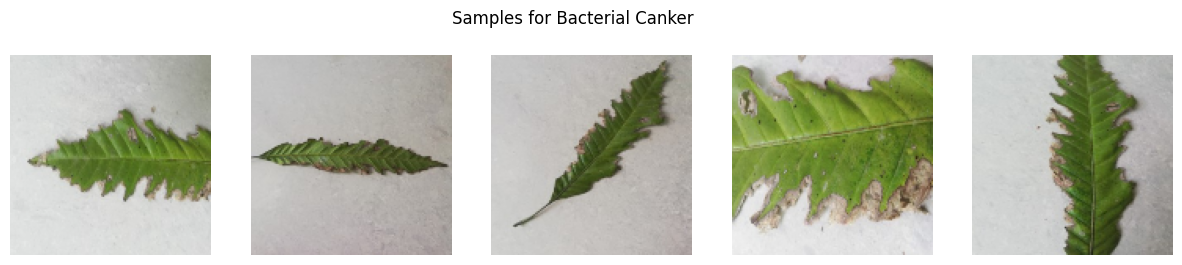

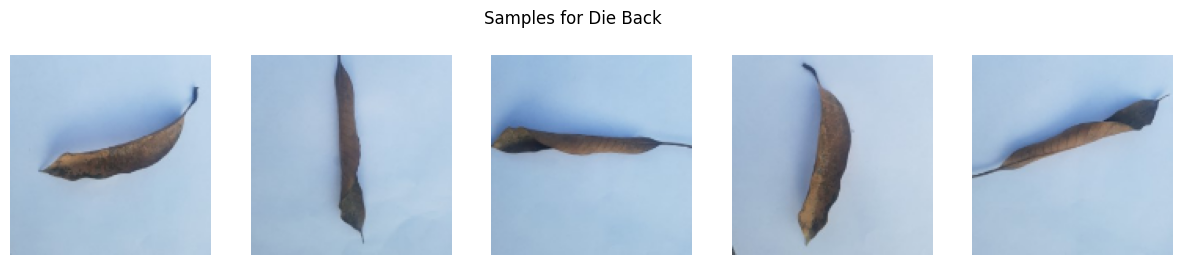

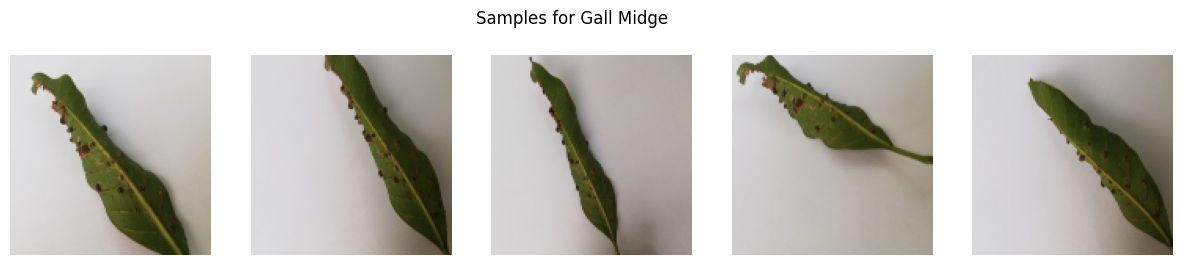

In [8]:
# Plot sample images for each class
for i, class_name in enumerate(classes):
    sample_images = images[labels == i][:5]  # Take first 5 images of each class
    fig, axs = plt.subplots(1, 5, figsize=(15, 3))
    fig.suptitle(f"Samples for {class_name}")
    for j, img in enumerate(sample_images):
        axs[j].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axs[j].axis('off')
    plt.show()


**Visualize Class Distribution**

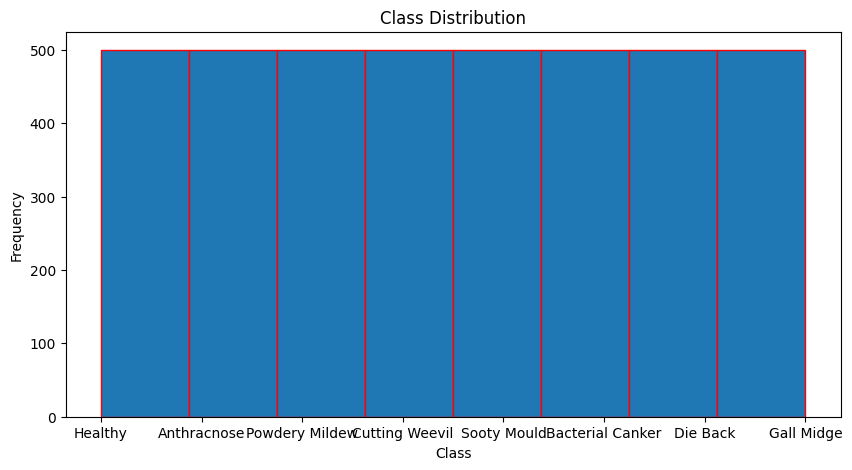

In [27]:
# Plot class distribution
plt.figure(figsize=(10, 5))
plt.hist(labels, bins=len(classes), edgecolor='red')
plt.xticks(ticks=range(len(classes)), labels=classes)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()


In [23]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'images' and 'labels' are defined and contain image data and labels

# Calculate average RGB

avg_rgb_values = []
for img in images:
    avg_color_per_row = np.average(img, axis=0)
    avg_color = np.average(avg_color_per_row, axis=0)
    avg_rgb_values.append(avg_color)

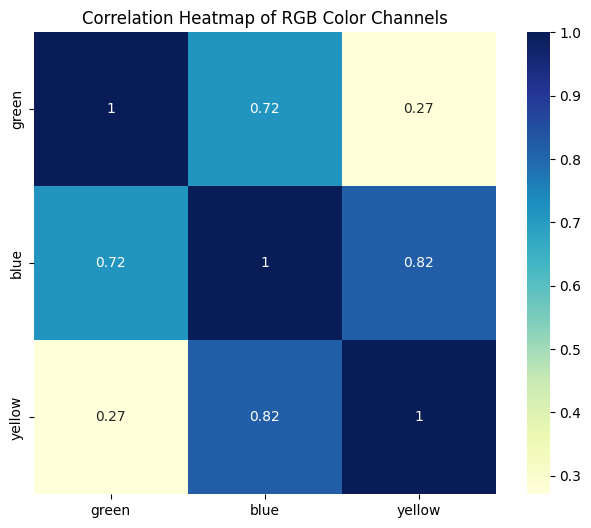

In [26]:
color_df = pd.DataFrame(avg_rgb_values, columns=[''])
plt.figure(figsize=(8, 6))
sns.heatmap(color_df.corr(), annot=True, cmap='YlGnBu', square=True)
plt.title("Correlation Heatmap of RGB Color Channels")
plt.show()

In [32]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... (your existing code to calculate avg_rgb_values and labels) ...

# Get unique class labels and their counts
unique_labels, label_counts = np.unique(labels, return_counts=True)

# Define label names (replace with your actual class names)
# For example, if your labels are 0, 1, 2... then you might define label_names like this:
label_names = ['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6', 'class_7']
# Make sure the length of label_names matches the number of unique labels in your dataset

# Convert avg_rgb_values to a NumPy array for easier indexing
avg_rgb_values = np.array(avg_rgb_values)

# 3. Average Color Intensity by Category
summary_data = {
    "Class Distribution": label_names,
    "Image Count": [label_counts[cat] for cat in range(len(label_names))],
    "Avg pink": [np.mean(avg_rgb_values[labels == cat, 0]) for cat in range(len(label_names))], # Now avg_rgb_values is a NumPy array
    "Avg blue": [np.mean(avg_rgb_values[labels == cat, 1]) for cat in range(len(label_names))],
    "Avg Red": [np.mean(avg_rgb_values[labels == cat, 2]) for cat in range(len(label_names))]
}
summary_df = pd.DataFrame(summary_data)

# Display the summary table
print("Class Distribution Summary Table")
display(summary_df)

Class Distribution Summary Table


,Class Distribution,Image Count,Avg pink,Avg blue,Avg Red
0,class_0,500,173.119382,184.125183,180.827063
1,class_1,500,177.381043,181.291865,175.884111
2,class_2,500,164.235554,168.028189,166.434599
3,class_3,500,198.101516,176.394646,152.015702
4,class_4,500,162.735904,175.105250,175.701873
5,class_5,500,161.357619,173.474733,174.161276
6,class_6,500,188.665198,171.646450,160.609038
7,class_7,500,171.364578,179.479750,180.386189


Visualization of Average Color Intensity by Category

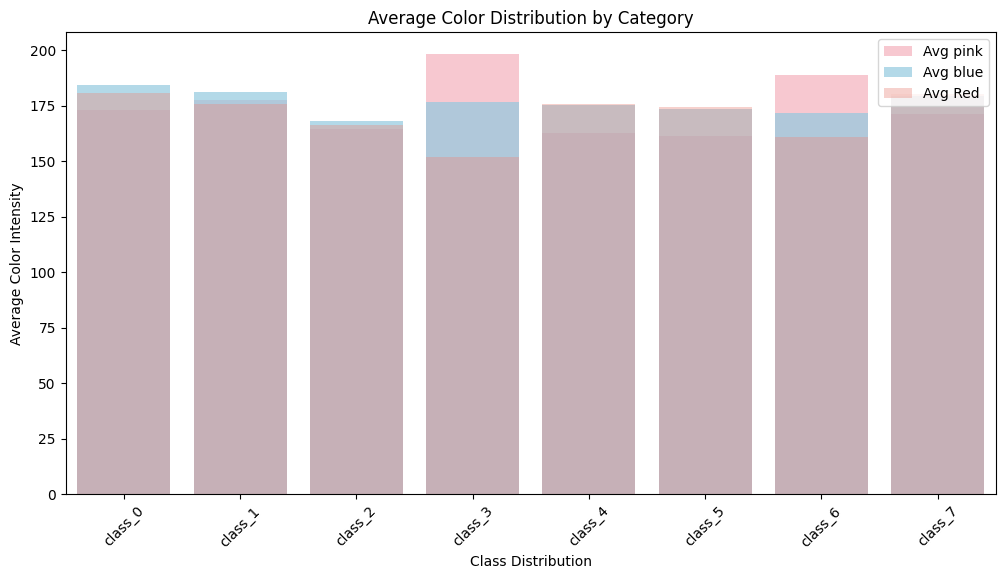

In [40]:
# Visualization of Average Color Intensity by Category
plt.figure(figsize=(12, 6))

# Specify different colors for each bar
sns.barplot(x='Class Distribution', y='Avg pink', data=summary_df, color='pink', label='Avg pink')  # Changed color to pink
sns.barplot(x='Class Distribution', y='Avg blue', data=summary_df, color='skyblue', label='Avg blue', alpha=0.7)  # Changed color to skyblue
sns.barplot(x='Class Distribution', y='Avg Red', data=summary_df, color='salmon', label='Avg Red', alpha=0.4)  # Changed color to salmon

plt.title("Average Color Distribution by Category")
plt.xticks(rotation=45)
plt.xlabel("Class Distribution")
plt.ylabel("Average Color Intensity")
plt.legend()
plt.show()


**Boxplot of RGB Intensities**

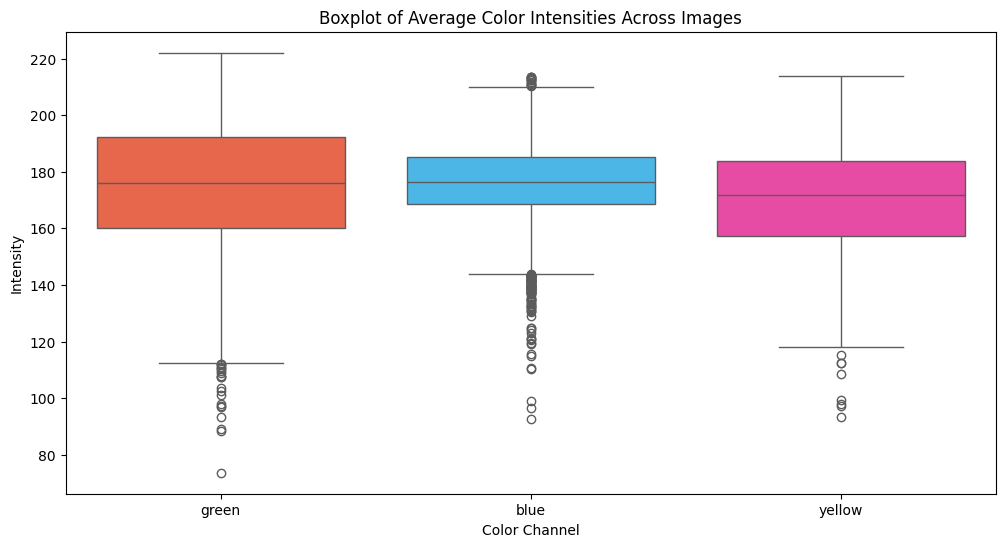

In [43]:
# Customized boxplot with specific colors for each color channel
plt.figure(figsize=(12, 6))

# Specify custom colors for each box
sns.boxplot(data=color_df, palette=["#FF5733", "#33C1FF", "#FF33A6"])  # Example colors: orange-red, sky blue, pink

plt.title("Boxplot of Average Color Intensities Across Images")
plt.xlabel("Color Channel")
plt.ylabel("Intensity")
plt.show()


 **KDE Plot of Color Intensities for Each Channel**

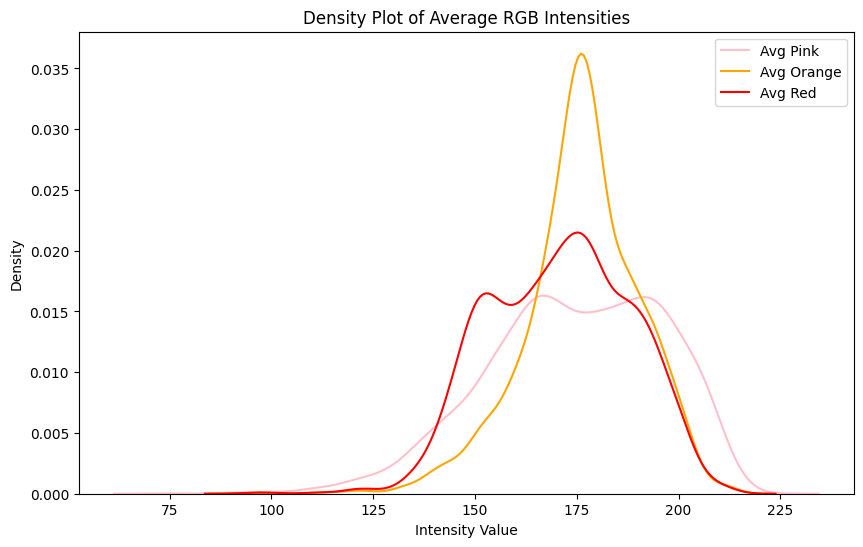

In [45]:
plt.figure(figsize=(10, 6))
for color, channel in zip(['pink', 'orange', 'red'], range(3)):
    sns.kdeplot(avg_rgb_values[:, channel], color=color, label=f'Avg {color.capitalize()}')
plt.title("Density Plot of Average RGB Intensities")
plt.xlabel("Intensity Value")
plt.ylabel("Density")
plt.legend()
plt.show()


**Feature Extraction**

In [10]:
def extract_features(images):
    features = []
    for img in images:
        hist = cv2.calcHist([img], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
        features.append(hist.flatten())
    return np.array(features)

X = extract_features(images)
y = labels


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Split Data into Training and Test Sets**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Train Random Forest and Decision Tree Models**

In [41]:
# Train Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)


**Model Evaluation**

In [14]:
# Evaluate Random Forest
print("Random Forest Classifier Results:")
print(classification_report(y_test, rf_preds, target_names=classes))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))
print("Accuracy:", accuracy_score(y_test, rf_preds))

# Evaluate Decision Tree
print("\nDecision Tree Classifier Results:")
print(classification_report(y_test, dt_preds, target_names=classes))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_preds))
print("Accuracy:", accuracy_score(y_test, dt_preds))


Random Forest Classifier Results:
                  precision    recall  f1-score   support

         Healthy       1.00      1.00      1.00       123
     Anthracnose       0.97      1.00      0.98        86
  Powdery Mildew       0.97      0.99      0.98       112
  Cutting Weevil       1.00      0.97      0.98       101
     Sooty Mould       0.98      0.94      0.96       104
Bacterial Canker       0.99      0.98      0.98        90
        Die Back       1.00      1.00      1.00        91
      Gall Midge       0.96      0.99      0.97        93

        accuracy                           0.98       800
       macro avg       0.98      0.98      0.98       800
    weighted avg       0.98      0.98      0.98       800

Confusion Matrix:
 [[123   0   0   0   0   0   0   0]
 [  0  86   0   0   0   0   0   0]
 [  0   0 111   0   1   0   0   0]
 [  0   3   0  98   0   0   0   0]
 [  0   0   3   0  98   0   0   3]
 [  0   0   0   0   1  88   0   1]
 [  0   0   0   0   0   0  91   0]
 [ 